<a href="https://colab.research.google.com/github/suharjin01/Submission_machine_learning_pemula/blob/main/Submission_machine_learning_pemula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Suharjin

Asal : Enrekang

Email : suharjin01@gmail.com

In [2]:
# Import Library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop

In [3]:
# Cek versi Tensorflow
print(tf.__version__)

2.3.0


In [4]:
# Unduh Dataset
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-12-14 12:57:55--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M   854KB/s    in 5m 46s  

2020-12-14 13:03:42 (911 KB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
# Ekstrak file zip yang telad di unduh
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('rps')
zip_ref.close()

In [6]:
# Install splitfolders
!pip install split_folders

In [7]:
import splitfolders
splitfolders.ratio('rps/rockpaperscissors/rps-cv-images', 'rps/rockpaperscissors/data', seed=1, ratio=(.6, .4))

Copying files: 2188 files [00:00, 3144.21 files/s]


In [8]:
base_dir = 'rps/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [9]:
os.listdir('rps/rockpaperscissors/data/train')
os.listdir('rps/rockpaperscissors/data/val')

['paper', 'rock', 'scissors']

In [10]:
# Membuat direktori
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_paper_dir = os.path.join(train_dir, 'paper')

validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [11]:
# Memuat image data generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # Direktori data latih
    target_size = (150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 32,
    class_mode = 'categorical' # karena klasifikasi 3 kelas maka kita menggunakan class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # Direktori data valdidasi
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [13]:
# Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [14]:
# Compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [15]:
# Latih model
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2
)

Epoch 1/20
25/25 - 44s - loss: 1.0840 - accuracy: 0.4550 - val_loss: 0.9761 - val_accuracy: 0.5063
Epoch 2/20
25/25 - 43s - loss: 0.7720 - accuracy: 0.6762 - val_loss: 0.5773 - val_accuracy: 0.7875
Epoch 3/20
25/25 - 43s - loss: 0.4601 - accuracy: 0.8375 - val_loss: 0.6391 - val_accuracy: 0.7312
Epoch 4/20
25/25 - 43s - loss: 0.3232 - accuracy: 0.8913 - val_loss: 0.2735 - val_accuracy: 0.9125
Epoch 5/20
25/25 - 43s - loss: 0.2153 - accuracy: 0.9312 - val_loss: 0.2145 - val_accuracy: 0.9438
Epoch 6/20
25/25 - 43s - loss: 0.2183 - accuracy: 0.9262 - val_loss: 0.2050 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 43s - loss: 0.2104 - accuracy: 0.9337 - val_loss: 0.1388 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 43s - loss: 0.1752 - accuracy: 0.9400 - val_loss: 0.2390 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 43s - loss: 0.1204 - accuracy: 0.9625 - val_loss: 0.1370 - val_accuracy: 0.9625
Epoch 10/20
25/25 - 43s - loss: 0.1059 - accuracy: 0.9613 - val_loss: 0.2727 - val_accuracy: 0.9125
Epoch 11/

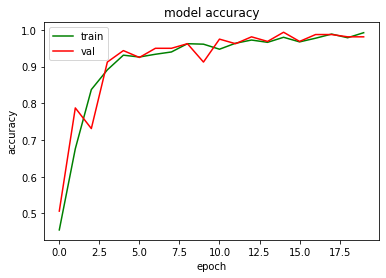

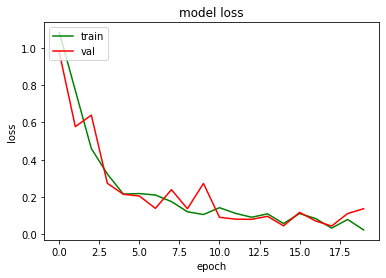

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, color='green')
plt.plot(val_acc, color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(loss, color='green')
plt.plot(val_loss, color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Saving 0Og76sl5CJhbxWWx.png to 0Og76sl5CJhbxWWx.png
0Og76sl5CJhbxWWx.png
PAPER


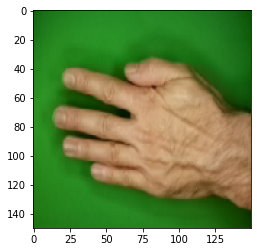

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uplouded = files.upload()
for fn in uplouded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image = np.vstack([x])
  classes = model.predict(image, batch_size = 32)

  print(fn)
  if classes[0,0] != 0:
    print('PAPER')
  elif classes[0,1] != 0:
    print('ROCK')
  else:
    print('SCISSORS')